
EOS 491/526 Assignment #3 

Daniel Scanks V00788200

Question #1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy.linalg as ag

print('solving overdetermined problem from Assignment 2, Question 1:')

#sensitivity matrix
A = np.matrix([[1.,1.,1.,1.,1.],[1.,1.,1.,1.,0.5],[1.,1.,1.,0.5,0],[1.,1.,0.5,0,0],[1.,0.5,0,0,0],[0.5,0,0,0,0]])
A_T = A.transpose()

#true model
m_t = np.matrix([1,2,3,4,5])
m_t = m_t.transpose()



#true data
d_t = np.matrix([15.,12.5,8.,4.5,2.,0.5])
d = d_t.transpose()

#calculating m with SVD
U,s,V_T = ag.svd(A) # SVD decomposition of A into components
one1 = np.dot(V_T.T,ag.inv(np.diag(s)))
U = np.delete(U,np.s_[-1:],1) #Making U NxM
pseudoinv_svd = np.dot(one1,U.T)
m= np.dot(pseudoinv_svd,d)
print('model solution using svd psuedoinverse:')
print m
print('Vs.')
print('least-squared-error solution from assignment 2:')
print(np.matrix([[1],[2],[3],[4],[5]]))
print('The SVD pseudo-inverse method does produce the same result as the least-squared-error method for an overdetermined problem')

print()
print('solving under-determined problem from Assignment 2, Question 1:')
#sensitivity matrix
A = np.matrix([[1.,1.,1.],[1.,1.,0]])
A_T = A.transpose()

#true model
mt = np.matrix([1.,2.,3.])
m_t = mt.transpose()

#true data
d_t = np.matrix([6.,3.])
d = d_t.transpose()

U,s,V_T = ag.svd(A) # SVD decomposition of A into components (s = lamda)
s = np.matrix([[2.13577921,0,],[0,0.66215345]]) #making s/Lamda into MxM diagonal matrix
invs = ag.inv(s)
invs = np.matrix([[ 0.46821319,0,0],[ 0, 1.51022395,0],[0,0,0]]) #Moore-Penrose
print('Moore-Penrose Inverse Lambda Matrix:')
print invs
one = np.dot(V_T.T,invs)
U = np.matrix([[-0.78820544,-0.61541221,0],[-0.61541221,0.78820544,0]]) #making U work for underdeterined calc
pseudoinv_svd = np.dot(one,U.T)
m= np.dot(pseudoinv_svd,d)
print('model solution using svd psuedoinverse:')
print m
print('Vs.')
print('smallest model solution from assignment 2:')
print(np.matrix([[1.5],[1.5],[3]]))
print('The SVD pseudo-inverse method does produce the same result as the smallest method for an underdetermined problem')


solving overdetermined problem from Assignment 2, Question 1:
model solution using svd psuedoinverse:
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
Vs.
least-squared-error solution from assignment 2:
[[1]
 [2]
 [3]
 [4]
 [5]]
The SVD pseudo-inverse method does produce the same result as the least-squared-error method for an overdetermined problem
()
solving under-determined problem from Assignment 2, Question 1:
Moore-Penrose Inverse Lambda Matrix:
[[ 0.46821319  0.          0.        ]
 [ 0.          1.51022395  0.        ]
 [ 0.          0.          0.        ]]
model solution using svd psuedoinverse:
[[ 1.5       ]
 [ 1.5       ]
 [ 2.99999998]]
Vs.
smallest model solution from assignment 2:
[[ 1.5]
 [ 1.5]
 [ 3. ]]
The SVD pseudo-inverse method does produce the same result as the smallest method for an underdetermined problem


Question 2

a) even determined
observed traveltime data for source at 0m
[[ 0.33338398]
 [ 0.33409011]
 [ 0.33509712]
 [ 0.33586526]
 [ 0.33672223]
 [ 0.33746802]
 [ 0.33806862]
 [ 0.33856045]
 [ 0.3395    ]
 [ 0.34025399]]
 predicted slowness model for source at 0m
[[ 0.00066663]
 [ 0.00066866]
 [ 0.00067168]
 [ 0.00067139]
 [ 0.00067215]
 [ 0.00067026]
 [ 0.00066648]
 [ 0.00066169]
 [ 0.00066541]
 [ 0.00065859]]


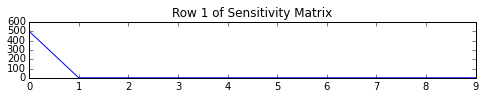

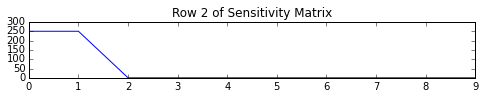

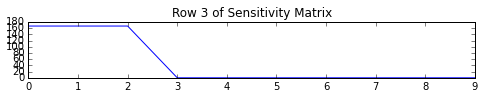

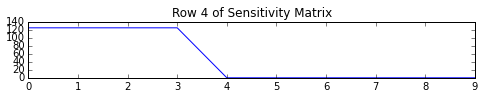

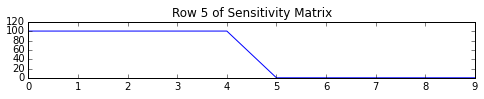

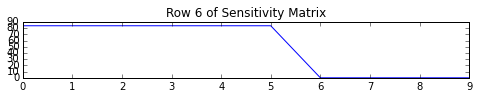

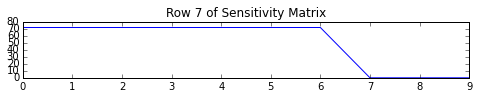

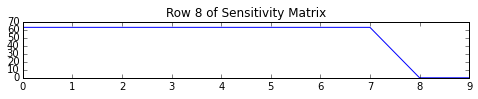

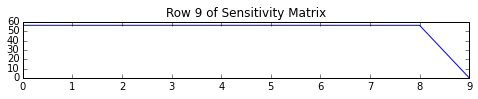

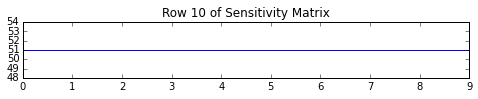

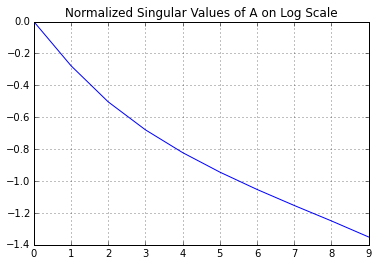

[ 10  20  30  40  50  60  70  80  90 100]


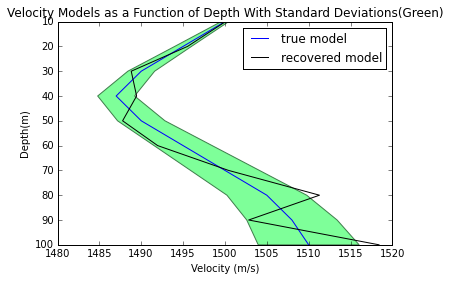

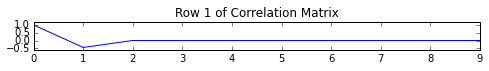

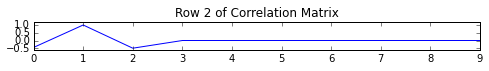

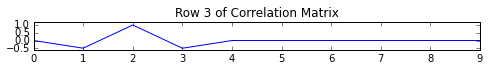

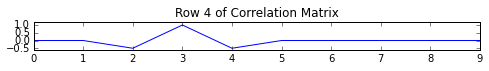

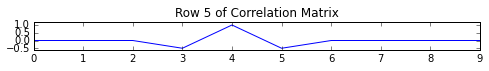

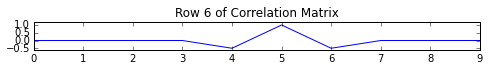

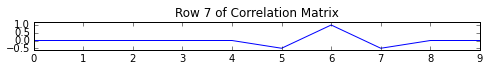

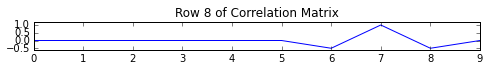

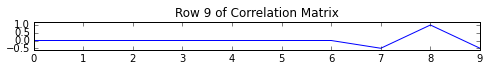

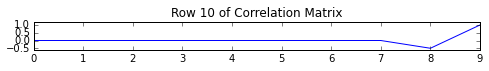

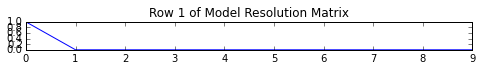

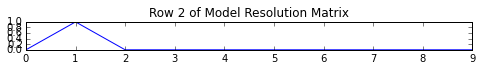

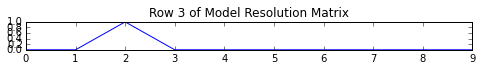

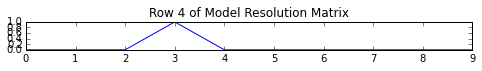

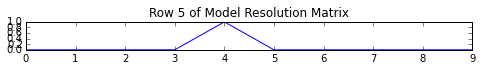

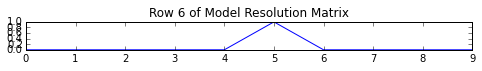

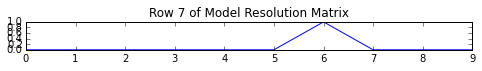

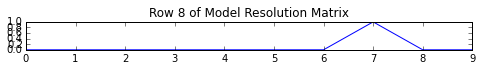

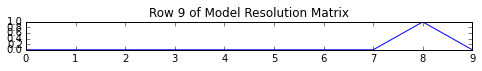

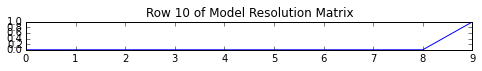

For a source at 0m, each of the 10 layers will recieve from 1-10 rays through it. This means the there will be data
for each layer. The first layer recieves all 10 rays, while the tenth recieves only one. As a result the standard
deviation increases with depth as seen in the model comparison. b/c of this the recovered model is less accurate with 
increasing depth. The resolution matrix is equal to the identity matrix


In [171]:

def matrixPlot(Ai, normtype):
    #normtype 1 normalizes whole matrix
    #normtype 2 normalizes rows of matrix

    N, M = Ai.shape

    if(normtype == 1):
        norm = np.max(abs(Ai))
        A = Ai/(norm*2)
    elif(normtype == 2):
        A = Ai*1.
        for i in range(0, N, 1):
            norm = np.max(abs(Ai[i,]))
            A[i,] = Ai[i,]/(norm*2)

    t = np.arange(0, M+1, 1)
    plt.figure()
    for i in range(0, N, 1):
        base = A[i,]*0.
        base.fill(N-i)
        plt.fill_between(t, base, A[i,]+base)
    plt.ylim(0,N+1)
    plot.axis('off')

x = 500. #distance

# reciever depth values (m)
z = np.arange(10,110,10) 


#noise (s)
n= np.random.normal(0,0.0001,10)
n = np.matrix(n)
noise = n.T


#velocities (m/s)
v = np.matrix([1500.,1495.,1490.,1487.,1490.,1495.,1500.,1505.,1508.,1510.])
#slowness vector for source at 0m - rays pass through all layers
m0 = np.array([1/1500.,1/1495.,1/1490.,1/1487.,1/1490.,1/1495.,1/1500.,1/1505.,1/1508.,1/1510.])
m0 = np.matrix(m0)
m0 = m0.T
#slowness vector for source at 90m- ray passes through 10th layer twice(surface and through)
m90 = np.array([1/1495.,1/1490.,1/1487.,1/1490.,1/1495.,1/1500.,1/1505.,1/1508.,1/1510.,1/1510.])
m90 = np.matrix(m90)
m90 = m90.T
#slowness vector for source at 50m- ray passes through 6th layer twice(surface and through)
m50 = np.array([1/1495.,1/1490.,1/1487.,1/1490.,1/1495.,1/1500.,1/1500.,1/1505.,1/1508.,1/1510.])
m50 = np.matrix(m50)
m50 = m50.T

#a square, even determined
print('a) even determined')
#d = Am + n
#layer thicknesses
t = 10

# source at 0m
sin0 = np.zeros(10)
for i in range(0,10): 
    sin0[i] = abs(z[i])/(np.sqrt(x**2+(z[i])**2))


#Asquare
A0 = np.zeros((10,10))
for i in range(0,10):
    n= 0
    while(n < i+1):
        A0[i,n] = t/sin0[i]
        n= n+1

#data
d0 = np.dot(A0,m0)
print('observed traveltime data for source at 0m')
d0_obs = d0 +noise
print d0_obs
#invert to find predicted model
A0inv = ag.inv(A0)
m0t = np.dot(A0inv,d0_obs)
print(' predicted slowness model for source at 0m')
print m0t


#i)

T = range(A0.shape[0])
for i in range(A0.shape[1]):
    plt.figure(figsize=(8,1))
    plt.plot(T, A0[i,:])
    plt.title('Row ' + str(i+1)+ ' of Sensitivity Matrix')
    plt.show()
    plt.tight_layout
#ii)
U, s, V = np.linalg.svd(A0, full_matrices=True)
snorm = s/707.18515799
plt.plot(np.log10(snorm))
plt.title('Normalized Singular Values of A on Log Scale')
plt.grid(True)
plt.show()

#iii/iv)
depth = np.array((10,20,30,40,50,60,70,80,90,100))
print depth
one = np.dot(A0.T,A0)
two = ag.inv(one)
cm = np.dot(0.0001**2,two)
vals = np.sqrt(np.diag(cm))
vsq = np.array((1500.**2,1495**2.,1490.**2,1487.**2,1490.**2,1495.**2,1500.**2,1505.**2,1508.**2,1510.**2))
#error values on velocities for each depth(layer)
unvel = np.zeros(10)
for i in range(0,10):
    unvel[i] = vals[i]*vsq[i]
x= np.squeeze(np.asarray(1/m0))
x1 = np.squeeze(np.asarray(1/m0t))

plt.plot(x,depth, label = 'true model',color ='b')
plt.plot(x1,depth, label = 'recovered model',color ='k')
plt.title('Velocity Models as a Function of Depth With Standard Deviations(Green)')
plt.fill_betweenx(depth,x-unvel,x+unvel,facecolor ='#7EFF99',edgecolor='#3F7F4C')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Velocity (m/s)')
plt.legend()
plt.show()

#v)
#correltion matrix
Rc = np.zeros((10,10))
for i in range (0,10):
    for j in range(0,10):
        Rc[i,j] = cm[i,j]/(np.sqrt(cm[i,i]*cm[j,j]))


T = range(Rc.shape[0])
for i in range(Rc.shape[1]):
    plt.figure(figsize=(8,0.5))
    plt.plot(T, Rc[i,:])
    plt.title('Row ' + str(i+1) + ' of Correlation Matrix' )
    plt.show()

#vi)
#resolution matrix
Rm = np.zeros((10,10))
for i in range (0,10):
    Rm[i,i] = 1.

T = range(Rm.shape[0])
for i in range(Rm.shape[1]):
    plt.figure(figsize=(8,0.5))
    plt.plot(T, Rm[i,:])
    plt.title('Row ' + str(i+1) + ' of Model Resolution Matrix' )
    plt.show()
#vii)
print('For a source at 0m, each of the 10 layers will recieve from 1-10 rays through it. This means the there will be data')
print('for each layer. The first layer recieves all 10 rays, while the tenth recieves only one. As a result the standard')
print('deviation increases with depth as seen in the model comparison. b/c of this the recovered model is less accurate with ')
print( 'increasing depth. The resolution matrix is equal to the identity matrix')

b) over-determined
 predicted slowness model for sources at 0,50,90m
[[ 0.00066602]
 [ 0.00066935]
 [ 0.00067069]
 [ 0.00067246]
 [ 0.00067134]
 [ 0.0006689 ]
 [ 0.00066604]
 [ 0.00066505]
 [ 0.00066313]
 [ 0.00066239]]


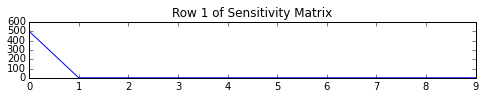

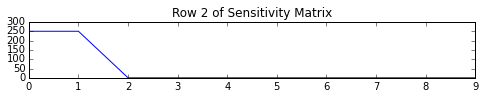

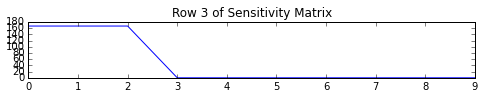

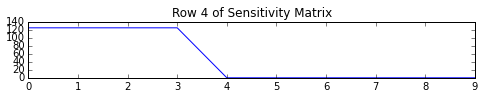

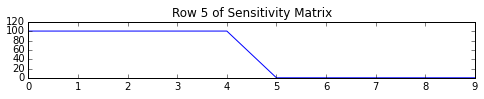

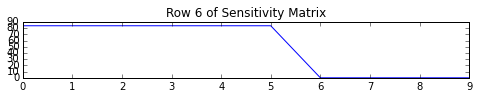

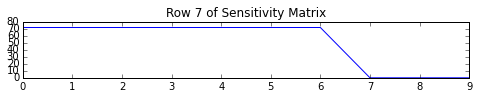

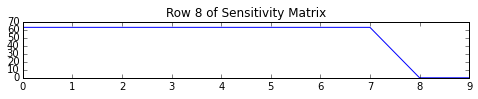

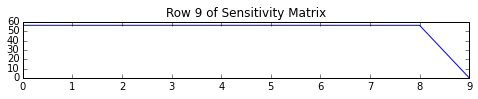

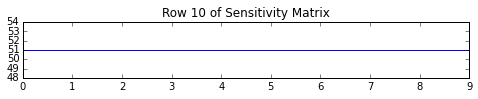

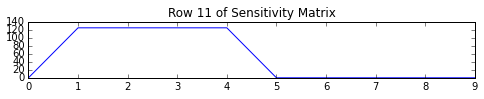

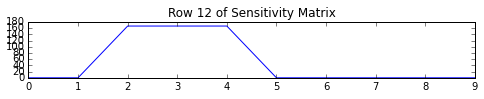

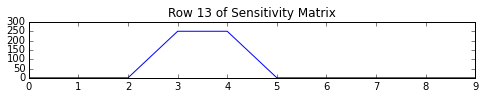

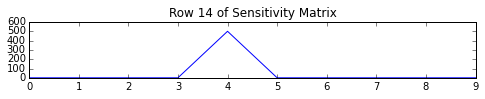

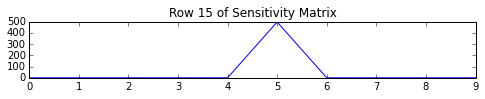

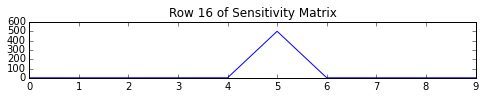

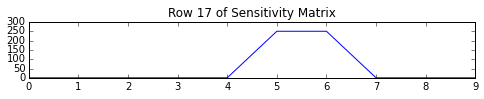

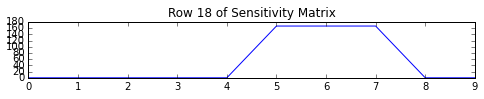

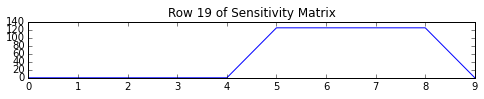

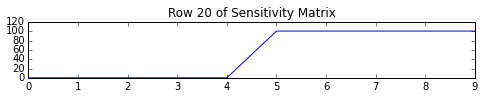

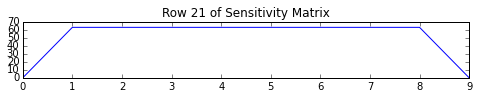

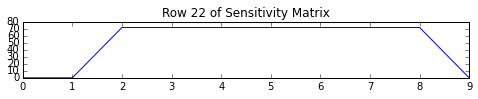

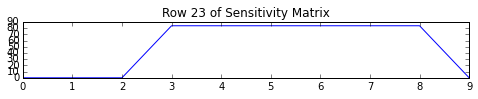

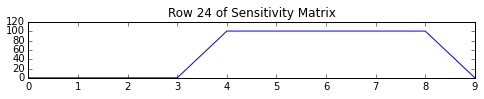

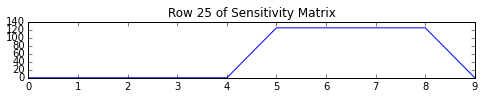

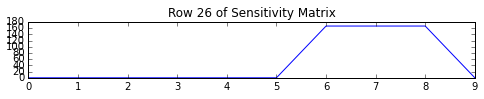

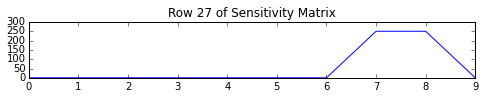

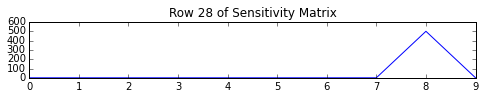

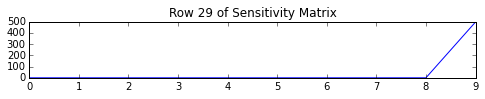

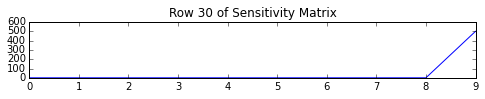

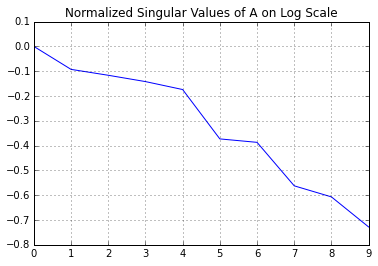

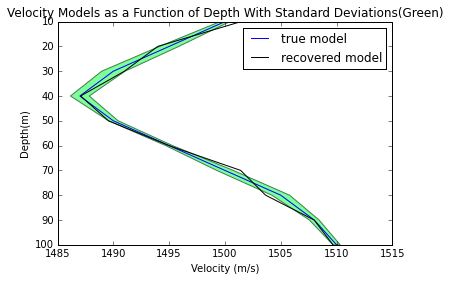

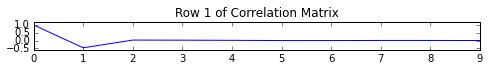

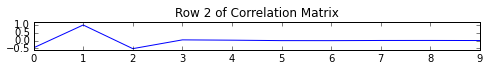

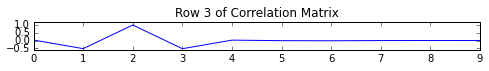

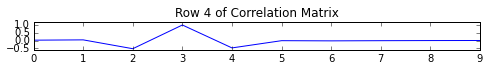

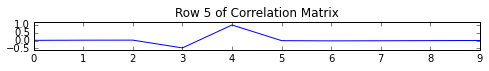

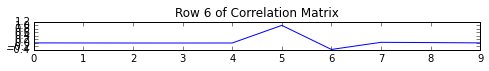

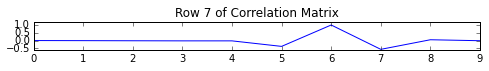

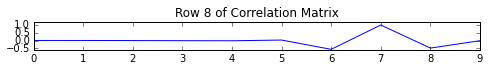

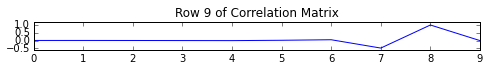

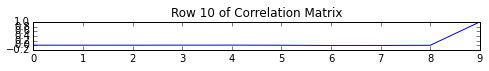

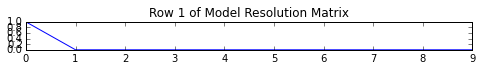

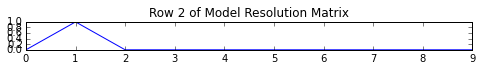

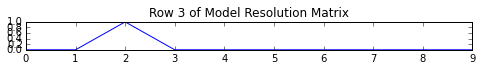

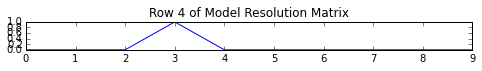

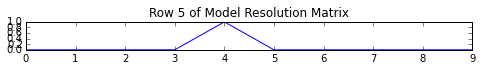

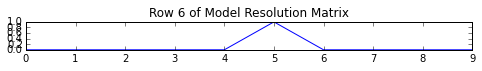

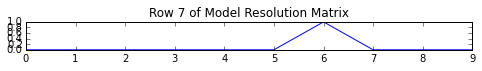

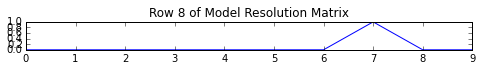

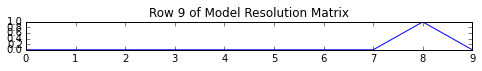

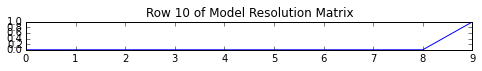

for this overdetermined case, we see that all layers except the first see multiple rays, and therefore the
standard deviation is much lower as the recovered model is more accurate. The resolution matrix is equal to the
identity matrix for this overdetermined case.


In [182]:
#-------------------------------------------------------------part b
z = np.arange(10,110,10)
x= 500.
print('b) over-determined')
# source at 50m
sin50 = np.zeros(10)
for i in range(0,10): 
    sin50[i] = abs(z[i]-50)/(np.sqrt(x**2+(z[i]-50)**2))

A50 = np.zeros((10,10))
for i in range(0,10):
    if i == 4:
        A50[i,5] = x
    elif i < 4:
        n=4
        while(n > i):
            A50[i,n] = t/sin50[i]
            n = n-1
    else:
        n= 5 
        while(n < i+1):
            A50[i,n] = t/sin50[i]
            n = n+1


# source at 90m
sin90 = np.zeros(10)
for i in range(0,10): 
    sin90[i] = abs(z[i]-90)/(np.sqrt(x**2+(z[i]-90)**2))

A90 = np.zeros((10,10))
for i in range(0,10):
    if i == 8:
        A90[i,9] = x
    elif i == 9:
        A90[i,9] = np.abs(z[9]-z[8])/sin90[9]
    else:
        n= 8 
        while(n > i):
            A90[i,n] = t/sin90[i]
            n = n-1
#noise
n= np.random.normal(0,0.0001,30)
n = np.matrix(n)
noise = n.T

#new A
Ab = np.concatenate((A0, A50, A90), axis=0)
#data
db = np.dot(Ab,m0)
db_obs = db +noise
#invert to find predicted model
one = np.dot(Ab.T,Ab)
invone = ag.inv(one)
two = np.dot(invone,Ab.T)
mb = np.dot(two,db_obs)
print(' predicted slowness model for sources at 0,50,90m')
print mb

#i)
T = range(Ab.shape[1])
for i in range(Ab.shape[0]):
    plt.figure(figsize=(8,1))
    plt.plot(T, Ab[i,:])
    plt.title('Row ' + str(i+1)+ ' of Sensitivity Matrix')
    plt.show()
    plt.tight_layout
#ii)
U, s, V = np.linalg.svd(Ab, full_matrices=True)
snorm = s/np.max(s)
plt.plot(np.log10(snorm))
plt.title('Normalized Singular Values of A on Log Scale')
plt.grid(True)
plt.show()
#iii/iv)
depth = np.array((10,20,30,40,50,60,70,80,90,100))
one = np.dot(Ab.T,Ab)
two = ag.inv(one)
cm = np.dot(0.0001**2,two)
vals = np.sqrt(np.diag(cm))
vsq = np.array((1500.**2,1495**2.,1490.**2,1487.**2,1490.**2,1495.**2,1500.**2,1505.**2,1508.**2,1510.**2))
#error values on velocities for each depth(layer)
unvel = np.zeros(10)
for i in range(0,10):
    unvel[i] = vals[i]*vsq[i]
x= np.squeeze(np.asarray(1/m0))
x1 = np.squeeze(np.asarray(1/mb))

plt.plot(x,depth, label = 'true model',color ='b')
plt.plot(x1,depth, label = 'recovered model',color ='k')
plt.title('Velocity Models as a Function of Depth With Standard Deviations(Green)')
plt.fill_betweenx(depth,x-unvel,x+unvel,facecolor ='#7EFF99',edgecolor='#3F7F4C')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Velocity (m/s)')
plt.legend()
plt.show()

#v)
#correltion matrix
Rc = np.zeros((10,10))
for i in range (0,10):
    for j in range(0,10):
        Rc[i,j] = cm[i,j]/(np.sqrt(cm[i,i]*cm[j,j]))


T = range(Rc.shape[0])
for i in range(Rc.shape[1]):
    plt.figure(figsize=(8,0.5))
    plt.plot(T, Rc[i,:])
    plt.title('Row ' + str(i+1) + ' of Correlation Matrix' )
    plt.show()

#vi)
#resolution matrix
Rm = np.zeros((10,10))
for i in range (0,10):
    Rm[i,i] = 1.

T = range(Rm.shape[0])
for i in range(Rm.shape[1]):
    plt.figure(figsize=(8,0.5))
    plt.plot(T, Rm[i,:])
    plt.title('Row ' + str(i+1) + ' of Model Resolution Matrix' )
    plt.show()
#vii)
print('for this overdetermined case, we see that all layers except the first see multiple rays, and therefore the')
print('standard deviation is much lower as the recovered model is more accurate. The resolution matrix is equal to the')
print('identity matrix for this overdetermined case.')

In [189]:
#-----------------------------------------------------------------partc
print('c)')
zmiss = np.array((10,20,40,50,60,70,80,90,100))
x = 500.
#new matrix (A0 minus row 3)
Ac = np.delete(A0, (2), axis=0)
#noise
n= np.random.normal(0,0.0001,9)
n = np.matrix(n)
noise = n.T
#data
dc = np.dot(Ac,m0)
print('observed traveltime data for source at 0m with no 30m receiver')
dc_obs = dc +noise
print dc_obs
#invert to find predicted model
one = np.dot(Ac,Ac.T)
oneinv = ag.inv(one)
two = np.dot(Ac.T,oneinv)
mc = np.dot(two,dc_obs)
print(' predicted slowness model for source at 0m with no 30m receiver')
print mc



c)
observed traveltime data for source at 0m with no 30m receiver
[[ 0.33346869]
 [ 0.33427721]
 [ 0.33599076]
 [ 0.33656376]
 [ 0.33730789]
 [ 0.33822295]
 [ 0.33875578]
 [ 0.33963332]
 [ 0.34047233]]
 predicted slowness model for source at 0m with no 30m receiver
[[ 0.0006668 ]
 [ 0.00066924]
 [ 0.00067166]
 [ 0.00067166]
 [ 0.00066957]
 [ 0.00066993]
 [ 0.00067053]
 [ 0.00066263]
 [ 0.00066469]
 [ 0.00066051]]
